# QuantumSim - Shor's Algorithm

Author: Nico Kuijpers<br>
Date: May 10, 2024

This notebook is based on the following notebooks for Qiskit, but uses QuantumSim instead of Qiskit.

https://github.com/Qiskit/textbook/blob/main/notebooks/ch-algorithms/shor.ipynb

https://github.com/qiskit-community/qiskit-community-tutorials/blob/master/algorithms/shor_algorithm.ipynb

https://www.qmunity.tech/tutorials/shors-algorithm

For the description of Shor's Algorithm we use in this notebook, see https://en.wikipedia.org/wiki/Shor%27s_algorithm

## Introduction
Shor's algorithm is a quantum algorithm for finding the prime factors of an integer. It was discovered in 1994 by the American mathematician Peter Shor.

If a quantum computer with a sufficient number of qubits could operate, then Shor's algorithm could be used to break public-key cryptography schemes, such as
* The RSA scheme
* The Finite Field Diffie-Hellman key exchange
* The Elliptic Curve Diffie-Hellman key exchange

Shor's Algorithm consists of a classical part and a quantum part. The quantum part solves the problem *period finding*.
Since a factoring problem can be turned into a period finding problem in polynomial time, an efficient period finding algorithm 
can be used to factor integers efficiently too. 

In this notebook, we first introduce Shor's Algorithm with a classical implemenation of the *period finding* problem and then replace the
classical *period finding* algorithm with it's quantum counterpart.

## Shor's Algorithm
In Shor's Algorithm, input $N$ is odd and not a prime power. The output are the non-trivial prime factors of $N$.

Shor's Algorithm consists of multiple steps. In step 4 a quantum subroutine is called to find the order $r$ of $a$ (mod $N$).
1. Pick a random number $1<a<N$.
2. Compute $K=\text{gcd}(a,N)$, the greatest common divisor of $a$ and $N$.
3. If $K \neq 1$, then $K$ is a non-trivial factor of $N$, with the other factor being $\frac{N}{K}$ and we are done.
4. Otherwise, use the quantum subroutine to find the order $r$ of $a$.
5. If $r$ is odd, then go back to step 1.
6. Compute $g = \text{gcd}(N, a^{r/2} + 1)$. If $g$ is nontrivial, the other factor is $\frac{N}{g}$, and we're done.
Otherwise, go back to step 1.

It has been shown that this will be likely to succeed after a few runs. In practice, a single call to the quantum 
order-finding subroutine is enough to completely factor $N$ with very high probability of success if one uses a more 
advanced reduction.

## A classical implementation of Shor's Algorithm
To find the order $r$ of $a$ (step 4 above) in a classical way, we define $q=1$ and multiply $q$ with $a$ each step
until $q \cdot a \equiv 1 \text{ mod } N$. The number of steps is $r$. 

For example, say $N = 15$. We choose $a = 7$. Then $\text{GCD}(7,15) = 1$. Initiallly, $q = 1$.
1. $1 \times 7 \text{ mod } 15 = 7$
2. $7 \times 7 \text{ mod } 15 = 4$
3. $4 \times 7 \text{ mod } 15 = 13$
4. $13 \times 7 \text{ mod } 15 = 1$

The number of steps is $4$, so $r = 4$.

Below we show Python code implementing Shor's Algorithm with a classical function for finding the order $r$ of $a$ (mod $N$).

In [1]:
from math import gcd
import random

"""
Find the order r of a (classical implementation)
"""
def find_order_classical(a,N):
    print(f"Find order r for a = {a} and N = {N}")
    q = 1
    r = 1
    print(f"{q} x {a} mod {N} = {(q*a) % N}")
    while (q*a) % N != 1:
        q = (q*a) % N
        r = r + 1
        print(f"{q} x {a} mod {N} = {(q*a) % N}")
    return r

"""
Find non-trivial prime factors for given N.
It is assumed that N is odd and not a prime power.
"""
def classical_shor_algorithm(N, a=None):
    finished = False
    while not finished:
        # Step 1: Pick a random number 1 < a < N
        if a == None:
            a = random.randint(2, N-1)
            print(f"Random number a = {a}, with 1 < a < {N}")
        else:
            print(f"a = {a}")
            finished = True
        # Step 2: compute K = gcd(a,N), the greatest common divisor of a and N
        K = gcd(a,N)
        print(f"Step 2: K = gcd({a},{N}) = {K}")
        if K != 1:
            # Step 3: if K != 1, then K is a non-trivial factor of N, with the other factor being N/K and we are done
            print(f"Step 3: Two non-trivial factors of {N} are {K} and {int(N/K)}")
            finished = True
        else:
            # Step 4: Otherwise, use the quantum subroutine to find the order r of a
            # In the classical implementation we call the find_order subroutine
            r = find_order_classical(a,N)
            print(f"Step 4: r = {r}")
            if r % 2 == 1:
                # Step 5: If r is odd, then go back to step 1
                print(f"Step 5: r is odd, pick another random number")
                a = None
            else:
                # Step 6: Compute g = gcd(N, a**(r/2) + 1)
                # If g is nontrivial, the other factor is N/g and we're done.
                # Otherwise, go to step 1.
                g = gcd(N, a**(r//2) + 1)
                if g != 1 and g != N:
                    print(f"Step 6: Two non-trivial factors of {N} are {g} and {int(N/g)}")
                    finished = True
                else:
                    print(f"Step 6: No non-trivial factors found for g = {g}")
                    a = None


Below we run the classical version of Shor's Algorithm for $N = 15$ and $a$ ranging from $2$ through $14$. 

In [2]:
N = 15
for a in range(2, N):
    classical_shor_algorithm(N, a)

a = 2
Step 2: K = gcd(2,15) = 1
Find order r for a = 2 and N = 15
1 x 2 mod 15 = 2
2 x 2 mod 15 = 4
4 x 2 mod 15 = 8
8 x 2 mod 15 = 1
Step 4: r = 4
Step 6: Two non-trivial factors of 15 are 5 and 3
a = 3
Step 2: K = gcd(3,15) = 3
Step 3: Two non-trivial factors of 15 are 3 and 5
a = 4
Step 2: K = gcd(4,15) = 1
Find order r for a = 4 and N = 15
1 x 4 mod 15 = 4
4 x 4 mod 15 = 1
Step 4: r = 2
Step 6: Two non-trivial factors of 15 are 5 and 3
a = 5
Step 2: K = gcd(5,15) = 5
Step 3: Two non-trivial factors of 15 are 5 and 3
a = 6
Step 2: K = gcd(6,15) = 3
Step 3: Two non-trivial factors of 15 are 3 and 5
a = 7
Step 2: K = gcd(7,15) = 1
Find order r for a = 7 and N = 15
1 x 7 mod 15 = 7
7 x 7 mod 15 = 4
4 x 7 mod 15 = 13
13 x 7 mod 15 = 1
Step 4: r = 4
Step 6: Two non-trivial factors of 15 are 5 and 3
a = 8
Step 2: K = gcd(8,15) = 1
Find order r for a = 8 and N = 15
1 x 8 mod 15 = 8
8 x 8 mod 15 = 4
4 x 8 mod 15 = 2
2 x 8 mod 15 = 1
Step 4: r = 4
Step 6: Two non-trivial factors of 15 are 5 

Below, we run the classical version of Shor's Algorithm for $N=15$.
Each loop, a random value for $a$ is chosen between $2$ and $14$ until non-trivial prime factors are found.
You should run this cell multiple times to see the result for different values of $a$.

In [3]:
N = 15
classical_shor_algorithm(N)

Random number a = 5, with 1 < a < 15
Step 2: K = gcd(5,15) = 5
Step 3: Two non-trivial factors of 15 are 5 and 3


## A quantum implementation of Shor's Algorithm
We replace the classical *period finding* implementation with its quantum counterpart. 
We use QuantumSim to create and simulate execution of the quantum circuit.

In [4]:
from quantumsim import *

We create a quantum circuit of $n + m$ qubits. The first $n$ qubits will be brought in super position by applying the Hadamard gate.
The Pauli X gate is applied to qubit $n+m-1$.

Below a function is defined the initialize the qubits of a circuit with $n + m$ qubits.

In [5]:
def initialize_qubits(circuit:Circuit, n, m):

    for q in range(n):
        circuit.hadamard(q)
    circuit.pauli_x(n+m-1)

We will define the function *c_amod15* which returns controlled-U gate for $𝑎$ repeated $𝑥$ times. 

*c_amod15* will be a $4$ qubit unitary controlled by a $5$-th qubit which will be appended to the circuit.

In [6]:
def c_amod15(a, x):
    if a not in [2,7,8,11,13]:
        raise ValueError("'a' must be 2,7,8,11,13")
    circuit = Circuit(4)        
    for i in range(x):
        if a in [2,13]:
            circuit.swap(0,1)
            circuit.swap(1,2)
            circuit.swap(2,3)
        if a in [7,8]:
            circuit.swap(2,3)
            circuit.swap(1,2)
            circuit.swap(0,1)
        if a == 11:
            circuit.swap(1,3)
            circuit.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                circuit.pauli_x(q)
                
    return circuit

Next we will carry out modular exponentiation on the circuit and append the fifth qubit by passing the control qubit followed by $4$ target qubits.

In [7]:
def modular_exponentiation(circuit:Circuit, n, m, a):
    for x in range(n):
        exponent = 2**x
        circuit_amod15 = c_amod15(a, exponent)
        controlled_circuit_amod15 = circuit_amod15.create_controlled_circuit(x, n, n+m)
        circuit.append_circuit(controlled_circuit_amod15)

Below a function is defined to create a quantum circuit of $n + m$ qubits for given $a \in \{2,7,8,11,13\}$.
This circuit is used to find the order $r$ of $a$ (mod $N$).

In [8]:
def create_circuit_find_order(n, m, a):
    circuit = Circuit(n + m)
    initialize_qubits(circuit, n, m)
    modular_exponentiation(circuit, n, m, a)
    iqft = QuantumFourier.create_iqft_circuit(n, swap_registers=False)
    circuit.append_circuit_general(iqft, 0) # NOTE number of qubits must match
    return circuit


We create a circuit of $8$ qubits for $a=7$. This circuit is executed once and measured $10000$ times. Results are shown in a histogram.

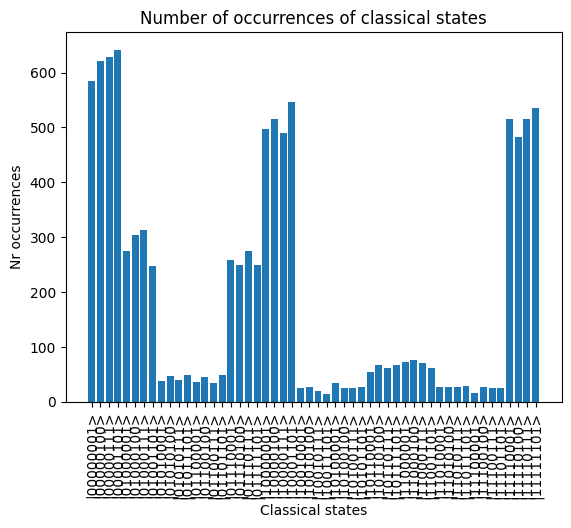

In [9]:
n = 4
m = 4
a = 7
circuit = create_circuit_find_order(n, m, a)
result = QuantumUtil.measure_circuit(circuit,10000)
QuantumUtil.histogram_of_classical_states(result)

Although we measure all eight qubits, we are only interested in the measured states of the first four qubits. 

In the code below, we go through all different classical states that were measured. 
For each measured state, we find a binary representation of the classical state of the first four qubits. 
This binary representation is then converted to a decimal number. The decimal numbers are stored in array *counts*.

In [10]:
histogram = Counter(result)
unique_strings = sorted(list(histogram.keys()))
counts = []
for string in unique_strings:
    # We are interested in the first four qubits after measurement
    binary_string = string[1:5]
    decimal_number = int(binary_string, 2)
    counts.append(decimal_number)
    print(f"{string} represents decimal number {decimal_number}")

|00000001> represents decimal number 0
|00000100> represents decimal number 0
|00000111> represents decimal number 0
|00001101> represents decimal number 0
|01000001> represents decimal number 4
|01000100> represents decimal number 4
|01000111> represents decimal number 4
|01001101> represents decimal number 4
|01010001> represents decimal number 5
|01010100> represents decimal number 5
|01010111> represents decimal number 5
|01011101> represents decimal number 5
|01100001> represents decimal number 6
|01100100> represents decimal number 6
|01100111> represents decimal number 6
|01101101> represents decimal number 6
|01110001> represents decimal number 7
|01110100> represents decimal number 7
|01110111> represents decimal number 7
|01111101> represents decimal number 7
|10000001> represents decimal number 8
|10000100> represents decimal number 8
|10000111> represents decimal number 8
|10001101> represents decimal number 8
|10010001> represents decimal number 9
|10010100> represents dec

Next, we find the unique values from array *counts*. These are the measured values. For each of the measured values we determine possible non-trivial factors according to steps 5 and 6 of Shor's Algorithm as previously described.

In [11]:
N = 15
a = 7
unique_values = set(counts)
for r in unique_values:
    print(f"Step 4: r = {r}")
    if r % 2 == 1:
        # Step 5: If r is odd, then go back to step 1
        print(f"Step 5: r is odd")
    else:
        # Step 6: Compute g = gcd(N, a**(r/2) + 1)
        # If g is nontrivial, the other factor is N/g and we're done.
        # Otherwise, go to step 1.
        g = gcd(N, a**(r//2) + 1)
        if g != 1 and g != N:
            print(f"Step 6: Two non-trivial factors of {N} are {g} and {int(N/g)}")
        else:
            print(f"Step 6: No non-trivial factors found for g = {g}")

Step 4: r = 0
Step 6: No non-trivial factors found for g = 1
Step 4: r = 4
Step 6: Two non-trivial factors of 15 are 5 and 3
Step 4: r = 5
Step 5: r is odd
Step 4: r = 6
Step 6: No non-trivial factors found for g = 1
Step 4: r = 7
Step 5: r is odd
Step 4: r = 8
Step 6: No non-trivial factors found for g = 1
Step 4: r = 9
Step 5: r is odd
Step 4: r = 10
Step 6: No non-trivial factors found for g = 1
Step 4: r = 11
Step 5: r is odd
Step 4: r = 12
Step 6: Two non-trivial factors of 15 are 5 and 3
Step 4: r = 13
Step 5: r is odd
Step 4: r = 14
Step 6: No non-trivial factors found for g = 1
Step 4: r = 15
Step 5: r is odd


Below, the quantum implementation of Shor's Algorithm is given using a quantum circuit as defined above.

In [12]:
from math import gcd
import random

"""
Find the order r of a (quantum implementation)
"""
def find_order_quantum(a,N):
    print(f"Find order r for a = {a} and N = {N}")
    n = int(math.log(N,2)) + 1
    m = n
    circuit = create_circuit_find_order(n, m, a)
    circuit.execute()
    circuit.measure()
    result = circuit.get_classical_state_as_string()
    binary_string = result[1:5]
    r = int(binary_string, 2)
    return r

"""
Find non-trivial prime factors for given N.
It is assumed that N is odd and not a prime power.
"""
def quantum_shor_algorithm(N, a=None):
    finished = False
    while not finished:
        # Step 1: Pick a random number 1 < a < N
        if a == None:
            while a not in [2,7,8,11,13]:
                a = random.randint(2, N-1)
            print(f"Random number a = {a}, with 1 < a < {N}")
        else:
            print(f"a = {a}")
            finished = True
        # Step 2: compute K = gcd(a,N), the greatest common divisor of a and N
        K = gcd(a,N)
        print(f"Step 2: K = gcd({a},{N}) = {K}")
        if K != 1:
            # Step 3: if K != 1, then K is a non-trivial factor of N, with the other factor being N/K and we are done
            print(f"Step 3: Two non-trivial factors of {N} are {K} and {int(N/K)}")
            finished = True
        else:
            # Step 4: Otherwise, use the quantum subroutine to find the order r of a
            # In the quantum implementation we call the find_order_quantum subroutine
            r = find_order_quantum(a, N)
            print(f"Step 4: r = {r}")
            if r % 2 == 1:
                # Step 5: If r is odd, then go back to step 1
                print(f"Step 5: r is odd, pick another random number")
                a = None
            else:
                # Step 6: Compute g = gcd(N, a**(r/2) + 1)
                # If g is nontrivial, the other factor is N/g and we're done.
                # Otherwise, go to step 1.
                g = gcd(N, a**(r//2) + 1)
                if g != 1 and g != N:
                    print(f"Step 6: Two non-trivial factors of {N} are {g} and {int(N/g)}")
                    finished = True
                else:
                    print(f"Step 6: No non-trivial factors found for g = {g}")
                    a = None


Below we apply the classical version of Shor's Algorithm for $N = 15$ and $a \in \{2,7,8,11,13\}$.

In [13]:
N = 15
for a in [2,7,8,11,13]:
    quantum_shor_algorithm(N,a)

a = 2
Step 2: K = gcd(2,15) = 1
Find order r for a = 2 and N = 15
Step 4: r = 10
Step 6: Two non-trivial factors of 15 are 3 and 5
a = 7
Step 2: K = gcd(7,15) = 1
Find order r for a = 7 and N = 15
Step 4: r = 5
Step 5: r is odd, pick another random number
a = 8
Step 2: K = gcd(8,15) = 1
Find order r for a = 8 and N = 15
Step 4: r = 8
Step 6: No non-trivial factors found for g = 1
a = 11
Step 2: K = gcd(11,15) = 1
Find order r for a = 11 and N = 15
Step 4: r = 0
Step 6: No non-trivial factors found for g = 1
a = 13
Step 2: K = gcd(13,15) = 1
Find order r for a = 13 and N = 15
Step 4: r = 11
Step 5: r is odd, pick another random number


Below, we run the quantum version of Shor's Algorithm for $N=15$.
Each loop, a random value for $a$ is drawn from the set $\{2,7,8,11,13\}$ until non-trivial prime factors are found.
Run this cell multiple times and inspect the results. In some cases you will observe that the value of $r$ may be 
different for the same values of $a$ and $N$, i.e., the quantum algorithm to find $r$ is not determenistic.

In [14]:
N = 15
quantum_shor_algorithm(N)

Random number a = 8, with 1 < a < 15
Step 2: K = gcd(8,15) = 1
Find order r for a = 8 and N = 15
Step 4: r = 12
Step 6: Two non-trivial factors of 15 are 5 and 3
